In [1]:
import ROOT
import random
import array
import sys
import os

Welcome to JupyROOT 6.24/00


In [2]:
tfile = ROOT.TFile('SkimTree_10.root','r')
ttree = tfile.Get('Events')

probe_pt = ROOT.TH1F('probe_pt', 'pt of all probe candidates', 200, 0, 200)
probe_ptC = ROOT.TH1F('probe_ptC', 'pt of probes after cut', 200, 0, 200)
invmass = ROOT.TH1F('invmass', 'invmass of all probe candidates', 1000, 40, 140)
invmass_C = ROOT.TH1F('invmass_C', 'invmass of probes after cut', 1000, 40, 140)

In [3]:
for i, entry in enumerate(ttree):
    if i == 100000:
        break
    mu_pts_per_event    = list(entry.Muon_pt)
    mu_etas_per_event   = list(entry.Muon_eta)
    mu_phis_per_event   = list(entry.Muon_phi)
    mu_mass_per_event   = list(entry.Muon_mass)
    mu_charge_per_event = list(entry.Muon_charge)
    mu_dxy_per_event    = list(entry.Muon_dxy)
    mu_dz_per_event     = list(entry.Muon_dz)
    mu_ip3d_per_event   = list(entry.Muon_ip3d)
    mu_iso_per_event    = list(entry.Muon_pfRelIso04_all)
    mu_tid_per_event    = list(entry.Muon_tightId)
    
    mu_clean_idxs = []
    for i in range(len(mu_pts_per_event)):
        
        if mu_pts_per_event[i] < 22:
            continue
        if abs(mu_etas_per_event[i]) > 2.4:
            continue
        if mu_iso_per_event[i] > 0.3:
            continue
        if mu_tid_per_event[i] < 0.9:
            continue
        mu_clean_idxs.append(i)
        
        
    if len(mu_clean_idxs) < 1:                              # Passing those events which at least have one Tag-Muon
        continue
        
    random.shuffle(mu_clean_idxs)                           # Randomizing the clean muon indices.
    
    tag_idxs = mu_clean_idxs[0]                             # Setting the first index of clean muons as the tag muon
    
    Tp4 = ROOT.TLorentzVector()                             # Finding the 4-momentum of Tag-Muon.
    Tp4.SetPtEtaPhiM(mu_pts_per_event[tag_idxs], 
                    mu_etas_per_event[tag_idxs], 
                    mu_phis_per_event[tag_idxs], 
                    mu_mass_per_event[tag_idxs])
    
    
    
    random.shuffle(mu_pts_per_event)                        # Randomizing the pts of all muons in the event.
    
    for k in range(len(mu_pts_per_event)):
        if k != tag_idxs:
            if mu_charge_per_event[k] * mu_charge_per_event[tag_idxs] < 0:  # tag and probe should have opposite charge
                                                                             
                Pp4 = ROOT.TLorentzVector()                  # Finding 4-momentum of Probe-muon
                Pp4.SetPtEtaPhiM(mu_pts_per_event[k], 
                                mu_etas_per_event[k], 
                                mu_phis_per_event[k], 
                                mu_mass_per_event[k])
                
                invm = (Tp4 + Pp4).M()                       # Invariant mass of Tag and Probe
                if 60 < invm < 120:
                    invmass.Fill(invm)                       # all probes passing inv. mass condition
                    probe_pt.Fill(mu_pts_per_event[k])
                    
                    if mu_tid_per_event[k] > 0.9 and mu_iso_per_event[k] < 0.3:
                        probe_ptC.Fill(mu_pts_per_event[k])
                        break               

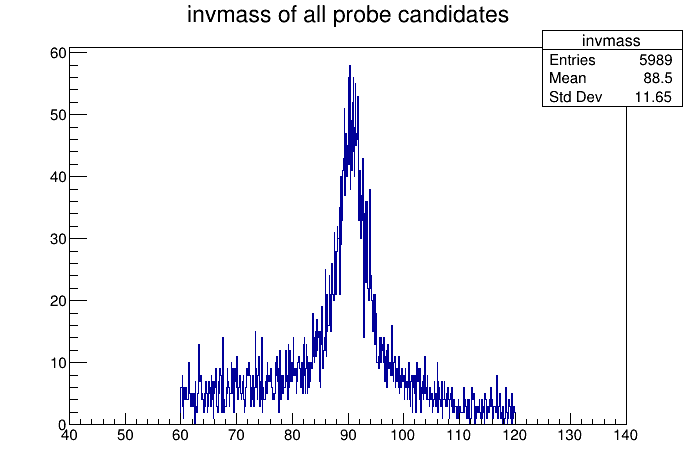

In [4]:
T1 = ROOT.TCanvas()
invmass.Draw()
T1.Draw()

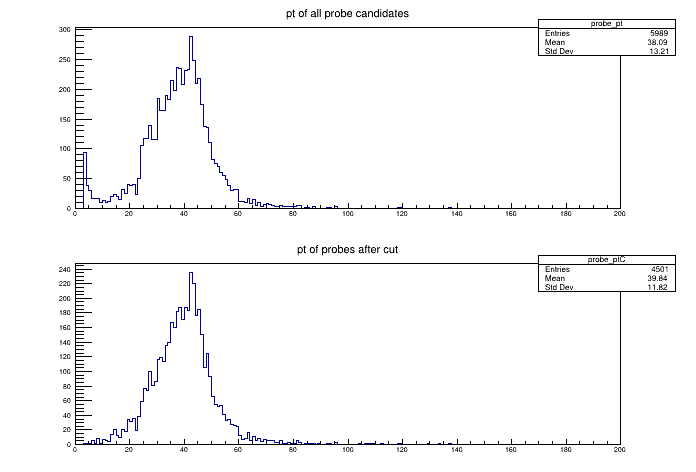

In [5]:
T2 = ROOT.TCanvas()
T2.Divide(1,2)
T2.cd(1)
probe_pt.Draw()
T2.cd(2)
probe_ptC.Draw()
T2.Draw()

In [6]:
binEdge = [0,6,10,17,20,28,33,38,43,48,60,200]
n = len(binEdge) - 1

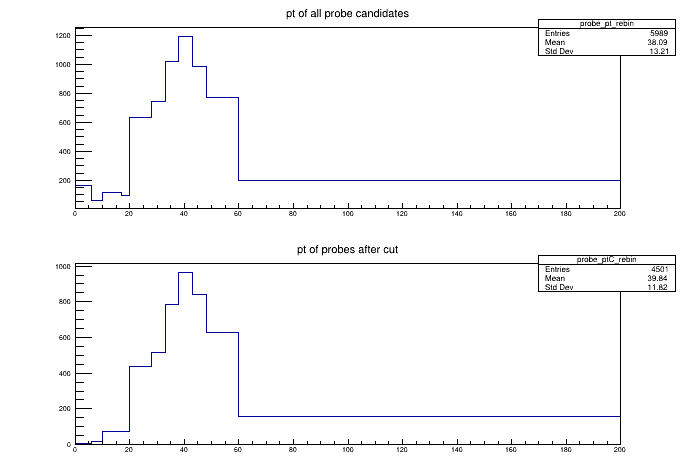

In [7]:
probe_pt_rebin = probe_pt.Rebin(n, "probe_pt_rebin", array.array('d', binEdge))
probe_ptC_rebin = probe_ptC.Rebin(n, "probe_ptC_rebin", array.array('d', binEdge))

T3 = ROOT.TCanvas()
T3.Divide(1,2)
T3.cd(1)
probe_pt_rebin.Draw()
T3.cd(2)
probe_ptC_rebin.Draw()
T3.Draw()

In [8]:
for i in range(1,n+1):
    print(i, ':', probe_pt_rebin[i])

1 : 164.0
2 : 61.0
3 : 114.0
4 : 98.0
5 : 632.0
6 : 743.0
7 : 1020.0
8 : 1196.0
9 : 987.0
10 : 774.0
11 : 199.0


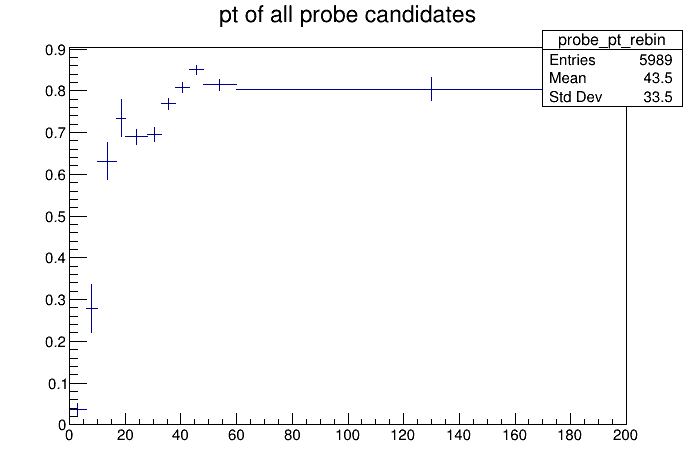

In [9]:
H = probe_pt_rebin.Clone()
H.Divide(probe_ptC_rebin, probe_pt_rebin, 1,1, 'B')
T4 = ROOT.TCanvas()
H.Draw()
T4.Draw()